# BỘ DỮ LIỆU TITANIC

Dữ liệu gồm:

Số dòng: 891 (mỗi dòng là một hành khách)

Số cột: 12 thuộc tính

Mô tả chi tiết các thuộc tính:

PassengerId: Mã định danh của hành khách (chỉ dùng để nhận dạng, không ảnh hưởng đến kết quả dự đoán).

Survived: Kết quả sống sót (nhãn cần dự đoán): 1 = sống sót, 0 = tử vong.

Pclass: Hạng vé: 1 = hạng nhất, 2 = hạng nhì, 3 = hạng ba (phản ánh mức kinh tế, ảnh hưởng đến cơ hội sống sót).

Name: Họ tên hành khách (có thể trích xuất thêm thông tin như danh xưng Mr., Mrs., Miss,...).

Sex: Giới tính: male hoặc female.

Age: Tuổi của hành khách

SibSp: Số anh chị em/vợ chồng đi cùng trên tàu.

Parch: Số cha mẹ/con cái đi cùng trên tàu.

Ticket: Mã số vé tàu.

Fare: Giá vé (liên quan đến hạng vé và khả năng sống sót).

Cabin: Mã số phòng .

Embarked: Cảng lên tàu: C = Cherbourg, Q = Queenstown, S = Southampton.


IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [ ]:
import numpy as np              # Tính toán số học
import pandas as pd             # Xử lý dữ liệu dạng bảng
import matplotlib.pyplot as plt # Vẽ biểu đồ

%matplotlib inline
# Hiển thị đồ thị ngay trên notebook

import matplotlib as mpl        # Thiết lập thêm cho matplotlib
mpl.rcParams['figure.dpi'] = 120  # Cho hình rõ hơn

# Các thư viện cho mô hình học máy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)

# Để vẽ cây quyết định giống bài mẫu, ta dùng graphviz
# Nếu dùng Colab thì chạy thêm:
# !apt-get install -y graphviz
# !pip install graphviz

import graphviz

ĐỌC DỮ LIỆU


In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload file
uploaded = files.upload()

# Hàm tự động tìm file theo từ khóa
def find_file(keyword):
    for filename in uploaded.keys():
        if keyword.lower() in filename.lower():
            return filename
    raise ValueError(f"Không tìm thấy file chứa từ khóa: {keyword}")

# Tự động tìm file theo từ khóa
train_file = find_file("train")
test_file = find_file("test")
gender_file = find_file("gender")

print("File train  tìm được:", train_file)
print("File test   tìm được:", test_file)
print("File gender tìm được:", gender_file)

# Đọc file theo tên đã tìm được
train_df = pd.read_csv(io.BytesIO(uploaded[train_file]))
test_df = pd.read_csv(io.BytesIO(uploaded[test_file]))
gender_df = pd.read_csv(io.BytesIO(uploaded[gender_file]))

print("\nKích thước train:", train_df.shape)
print("Kích thước test :", test_df.shape)
print("Kích thước gender_submission:", gender_df.shape)

train_df.head()

Saving gender_submission.csv to gender_submission.csv
Saving train.csv to train.csv
Saving test.csv to test.csv
File train  tìm được: train.csv
File test   tìm được: test.csv
File gender tìm được: gender_submission.csv

Kích thước train: (891, 12)
Kích thước test : (418, 11)
Kích thước gender_submission: (418, 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


KHÁM PHÁ DỮ LIỆU


In [ ]:
# Xem thông tin tổng quát về các cột: kiểu dữ liệu, số lượng non-null
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


GỘP TRAIN VÀ TEST ĐỂ TIỀN XỬ LÝ CHUNG

In [ ]:
# Lưu lại biến mục tiêu y
y = train_df['Survived']

# Gộp train (không gồm Survived) và test
full = pd.concat([train_df.drop('Survived', axis=1), test_df],
                 axis=0, ignore_index=True)

print("Kích thước full (train + test):", full.shape)
full.head()

Kích thước full (train + test): (1309, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


XỬ LÝ GIÁ TRỊ THIẾU

In [ ]:
# 1. Embarked: thay giá trị thiếu bằng mode
full['Embarked'] = full['Embarked'].fillna(full['Embarked'].mode()[0])

# 2. Fare: thay giá trị thiếu bằng median
full['Fare'] = full['Fare'].fillna(full['Fare'].median())

# 3. Age: thay bằng median
full['Age'] = full['Age'].fillna(full['Age'].median())

# 4. Cabin: quá nhiều missing -> drop (không gây warning)
full = full.drop(columns=['Cabin'])

# Kiểm tra
full.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


LOẠI BỎ CÁC CỘT ÍT HỮU ÍCH VÀ MÃ HÓA ONE-HOT

In [ ]:
# 1. Loại bỏ các cột khó xử lý / ít thông tin:
# - Name: có thể trích 'Title', nhưng để đơn giản ta drop
# - Ticket: khó xử lý trong phạm vi bài thực hành cơ bản
full = full.drop(columns=['Name', 'Ticket'])

# 2. Mã hóa one-hot cho các biến phân loại:
#    Sex (male/female), Embarked (C, Q, S), Pclass (1, 2, 3)
full_encoded = pd.get_dummies(full,
                              columns=['Sex', 'Embarked', 'Pclass'],
                              drop_first=True)  # drop_first để tránh đa cộng tuyến

print("Kích thước sau khi mã hóa:", full_encoded.shape)
full_encoded.head()

Kích thước sau khi mã hóa: (1309, 10)


,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,True,False,True,False,True
1,2,38.0,1,0,71.2833,False,False,False,False,False
2,3,26.0,0,0,7.9250,False,False,True,False,True
3,4,35.0,1,0,53.1000,False,False,True,False,False
4,5,35.0,0,0,8.0500,True,False,True,False,True


TÁCH LẠI THÀNH TẬP TRAIN VÀ TEST ĐÃ XỬ LÝ

In [ ]:
# Số dòng thuộc train ban đầu
n_train = train_df.shape[0]

X_all = full_encoded.iloc[:n_train, :]   # feature cho train
X_test_final = full_encoded.iloc[n_train:, :]  # feature cho test (dùng để dự đoán submit Kaggle)

print("X_all shape:", X_all.shape)
print("X_test_final shape:", X_test_final.shape)

X_all shape: (891, 10)
X_test_final shape: (418, 10)


CHIA TẬP TRAIN/VALIDATION

In [ ]:
# Chia dữ liệu train thành 2 phần:
# - X_train, y_train: dùng để train mô hình
# - X_valid, y_valid: dùng để đánh giá mô hình (validation set)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_all.values, y.values, test_size=0.2, random_state=42, stratify=y
)

print("Kích thước X_train:", X_train.shape)
print("Kích thước X_valid:", X_valid.shape)

Kích thước X_train: (712, 10)
Kích thước X_valid: (179, 10)


HUẤN LUYỆN MÔ HÌNH CÂY QUYẾT ĐỊNH

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Khởi tạo cây quyết định.
# Ta giới hạn độ sâu tối đa = 3 để tránh overfitting quá sớm.
dt = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)
# Huấn luyện mô hình
dt.fit(X_train, y_train)
# Dự đoán trên tập validation
y_valid_pred = dt.predict(X_valid)
y_valid_proba = dt.predict_proba(X_valid)[:, 1]  # xác suất lớp 1 (sống sót)

In [ ]:
# 1. Accuracy
acc = accuracy_score(y_valid, y_valid_pred)
# 2. Confusion matrix
cm = confusion_matrix(y_valid, y_valid_pred)
# 3. Classification report: precision, recall, f1-score
cls_report = classification_report(y_valid, y_valid_pred)
# 4. ROC AUC
auc = roc_auc_score(y_valid, y_valid_proba)
print("=== Decision Tree cơ bản (max_depth=3) ===")
print("Accuracy  :", acc)
print("ROC AUC   :", auc)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", cls_report)

=== Decision Tree cơ bản (max_depth=3) ===
Accuracy  : 0.7821229050279329
ROC AUC   : 0.8019104084321476

Confusion matrix:
 [[102   8]
 [ 31  38]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       110
           1       0.83      0.55      0.66        69

    accuracy                           0.78       179
   macro avg       0.80      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179



1. Độ chính xác (Accuracy = 0.7821)

Mô hình đạt 78%, ở mức tạm ổn cho Titanic nhưng chưa cao.

Điều này cho thấy mô hình có thể đang hơi đơn giản (max_depth=3).

2. ROC AUC = 0.8019, thể hiện khả năng phân biệt (survived vs. not survived) khá tốt.

3. Confusion Matrix

Mô hình dự đoán tốt lớp 0 (không sống sót) → 102/110 đúng.

Nhưng bỏ sót khá nhiều hành khách sống sót → chỉ nhận đúng 38/69.

VẼ CÂY QUYẾT ĐỊNH

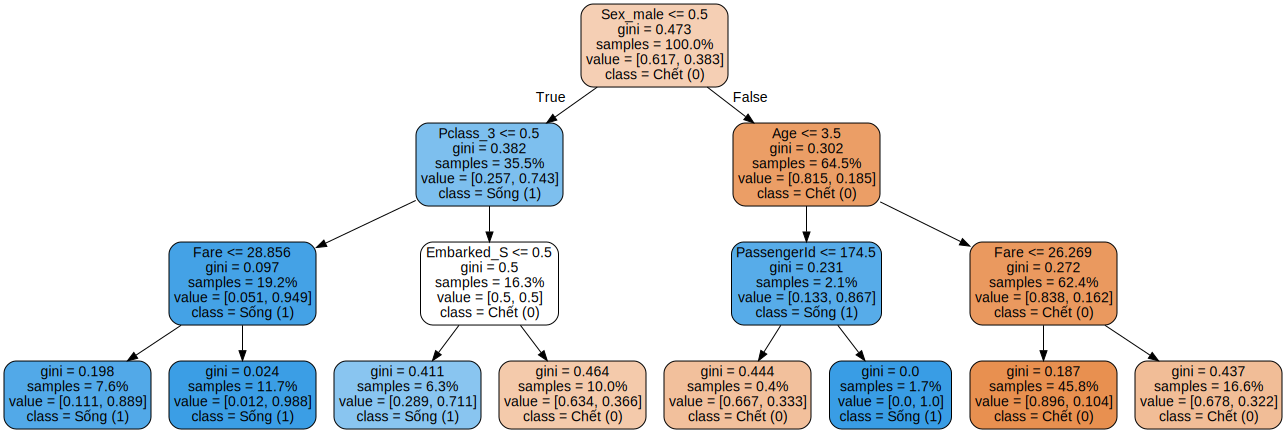

In [ ]:
# Để giống bài mẫu, ta dùng export_graphviz -> graphviz.Source
feature_names = full_encoded.columns.tolist()

dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=feature_names,
    proportion=True,
    class_names=['Chết (0)', 'Sống (1)']
)

graph = graphviz.Source(dot_data)
graph  # trong Colab sẽ hiển thị cây

1. Giới tính (Sex) là yếu tố quyết định mạnh nhất:

Nữ thường sống

Nam thường chết

2. Hạng vé (Pclass) và Fare phản ánh mức độ ưu tiên và khả năng tiếp cận thuyền cứu hộ:

Hạng cao và vé đắt → dễ sống

Hạng thấp → nguy cơ cao

3. Tuổi (Age) đặc biệt quan trọng với nam giới:

Trẻ nhỏ được ưu tiên → sống cao

Người lớn → nguy cơ chết cao

4. Embarked_S và PassengerId xuất hiện nhưng ít quan trọng hơn.

GRIDSEARCH TÌM max_depth TỐI ƯU CHO CÂY QUYẾT ĐỊNH

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tập các giá trị max_depth cần thử
params_dt = {
    'max_depth': [1, 2, 3, 4, 5, 6, 8, 10]
}

dt_base = DecisionTreeClassifier(random_state=42)

cv_dt = GridSearchCV(
    estimator=dt_base,
    param_grid=params_dt,
    scoring='roc_auc',   # đánh giá theo ROC AUC
    n_jobs=None,
    refit=True,          # sau khi tìm xong, fit lại mô hình tốt nhất trên toàn bộ X_train
    cv=4,
    verbose=1,
    return_train_score=True
)

cv_dt.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 8, 10]},
             return_train_score=True, scoring='roc_auc', verbose=1)

GridSearchCV đã thử nhiều độ sâu khác nhau và chọn max_depth=3 là tối ưu theo ROC AUC.

Cây sâu hơn không tăng hiệu suất, cho thấy dữ liệu Titanic không đòi hỏi mô hình phức tạp.

max_depth=3 giúp mô hình:

- tránh overfitting

- diễn giải rõ ràng

- hiệu quả tốt với AUC cao

KẾT QUẢ GRIDSEARCH CHO CÂY QUYẾT ĐỊNH

In [ ]:
cv_results_dt = pd.DataFrame(cv_dt.cv_results_)
cv_results_dt[['param_max_depth', 'mean_train_score', 'std_train_score',
               'mean_test_score', 'std_test_score']].sort_values('param_max_depth')

,param_max_depth,mean_train_score,std_train_score,mean_test_score,std_test_score
0,1,0.770288,0.003378,0.770269,0.010246
1,2,0.826190,0.004806,0.821983,0.018201
2,3,0.871329,0.003478,0.846495,0.018169
3,4,0.897271,0.005072,0.838545,0.022122
4,5,0.917444,0.009212,0.824330,0.026657
5,6,0.936752,0.007424,0.816982,0.025118
6,8,0.968393,0.004003,0.803360,0.024328
7,10,0.991139,0.002801,0.778248,0.010669


- max_depth tăng từ 1 → 3

mean_train_score tăng từ 0.770 → 0.871

mean_test_score cũng tăng, cao nhất tại max_depth = 3 (AUC ≈ 0.8465)
- max_depth = 4 trở đi → AUC test bắt đầu giảm

=> Các độ sâu lớn hơn làm tăng độ phức tạp nhưng không cải thiện hiệu suất, ngược lại còn giảm AUC test.

VẼ BIỂU ĐỒ max_depth VS ROC AUC (TRAIN & TEST)

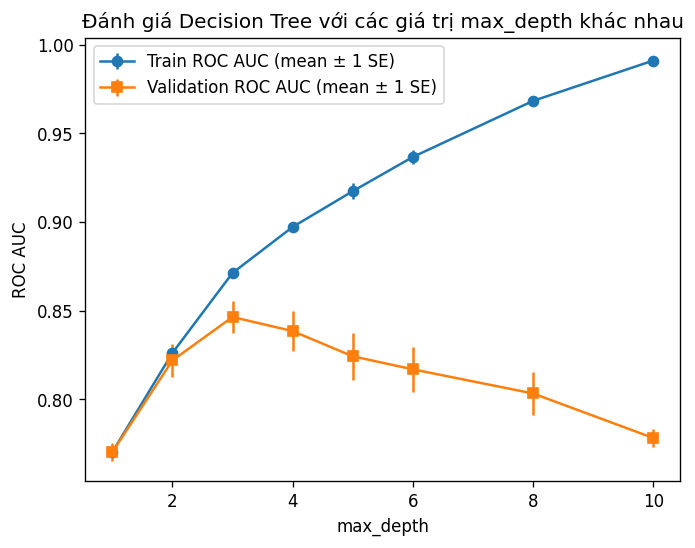

In [ ]:
ax = plt.axes()

# Số fold = 4 -> SE = std / sqrt(4)
ax.errorbar(cv_results_dt['param_max_depth'],
            cv_results_dt['mean_train_score'],
            yerr=cv_results_dt['std_train_score'] / np.sqrt(4),
            label='Train ROC AUC (mean ± 1 SE)',
            marker='o')

ax.errorbar(cv_results_dt['param_max_depth'],
            cv_results_dt['mean_test_score'],
            yerr=cv_results_dt['std_test_score'] / np.sqrt(4),
            label='Validation ROC AUC (mean ± 1 SE)',
            marker='s')

ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Đánh giá Decision Tree với các giá trị max_depth khác nhau')
plt.show()

MÔ HÌNH CÂY QUYẾT ĐỊNH TỐI ƯU

In [ ]:
print("Best params:", cv_dt.best_params_)
best_dt = cv_dt.best_estimator_

# Dự đoán trên tập validation
y_valid_pred_best = best_dt.predict(X_valid)
y_valid_proba_best = best_dt.predict_proba(X_valid)[:, 1]

acc_best = accuracy_score(y_valid, y_valid_pred_best)
auc_best = roc_auc_score(y_valid, y_valid_proba_best)

print("Accuracy (best DT):", acc_best)
print("ROC AUC (best DT) :", auc_best)

Best params: {'max_depth': 3}
Accuracy (best DT): 0.7821229050279329
ROC AUC (best DT) : 0.8019104084321476


GridSearchCV xác định max_depth = 3 là tham số tối ưu, giúp mô hình đạt hiệu suất tốt nhất với ROC AUC ~0.80 và accuracy ~0.78. Mô hình không quá phức tạp, hạn chế overfitting và mô tả tốt những yếu tố chính ảnh hưởng đến khả năng sống sót trên Titanic.

MÔ HÌNH RỪNG CÂY (RANDOM FOREST) CƠ BẢN

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,      # số cây trong rừng (ban đầu)
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt', # số feature được chọn ngẫu nhiên tại mỗi node
    bootstrap=True,
    random_state=42,
    n_jobs=-1             # dùng tất cả CPU cores để train nhanh hơn
)

rf.fit(X_train, y_train)

y_valid_pred_rf = rf.predict(X_valid)
y_valid_proba_rf = rf.predict_proba(X_valid)[:, 1]

print("=== Random Forest cơ bản ===")
print("Accuracy:", accuracy_score(y_valid, y_valid_pred_rf))
print("ROC AUC :", roc_auc_score(y_valid, y_valid_proba_rf))

=== Random Forest cơ bản ===
Accuracy: 0.8044692737430168
ROC AUC : 0.8420948616600791


Kết quả mô hình Random Forest cơ bản

Accuracy: 0.8045

ROC AUC: 0.8421

➡ Hiệu suất cao hơn so với cây quyết định đơn lẻ (AUC từ 0.80 → 0.84).
=> Random Forest cơ bản đã cho kết quả tốt hơn mô hình cây quyết định tối ưu, thể hiện qua độ chính xác và AUC đều tăng. Điều này phù hợp với lý thuyết vì Random Forest có khả năng giảm overfitting và khai thác nhiều cây quyết định để tạo ra dự đoán ổn định hơn.

GRIDSEARCH TÌM n_estimators TỐI ƯU

In [ ]:
rf_for_gs = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Tập tham số n_estimators giống bài mẫu (10 -> 100, bước 10)
rf_params = {
    'n_estimators': list(range(10, 110, 10))
}

cv_rf = GridSearchCV(
    estimator=rf_for_gs,
    param_grid=rf_params,
    scoring='roc_auc',
    n_jobs=-1,
    refit=True,
    cv=4,
    verbose=1,
    return_train_score=True
)

cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

Sau khi huấn luyện mô hình Random Forest cơ bản, ta tiếp tục dùng GridSearchCV để tìm giá trị tối ưu của siêu tham số n_estimators. Kết quả cho thấy n_estimators = 70 mang lại ROC AUC cao nhất. Điều này chứng minh rằng tăng số lượng cây giúp cải thiện độ ổn định của mô hình, tuy nhiên hiệu suất bắt đầu bão hòa khi số cây vượt quá mức này

KẾT QUẢ GRIDSEARCH CHO RANDOM FOREST

In [ ]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)
cv_rf_results_df[['param_n_estimators', 'mean_fit_time', 'std_fit_time',
                  'mean_test_score', 'std_test_score']].sort_values('param_n_estimators')

,param_n_estimators,mean_fit_time,std_fit_time,mean_test_score,std_test_score
0,10,0.159496,0.022849,0.868182,0.027822
1,20,0.254092,0.065218,0.869936,0.028733
2,30,0.332671,0.060853,0.869332,0.029503
3,40,0.408978,0.004954,0.870069,0.027797
4,50,0.365389,0.070671,0.870085,0.028308
5,60,0.302991,0.064077,0.870314,0.028104
6,70,0.283120,0.052124,0.872319,0.028092
7,80,0.415427,0.050237,0.870697,0.026637
8,90,0.356358,0.025509,0.870998,0.026903
9,100,0.437353,0.044985,0.872032,0.027507


- Từ 10 → 70 cây, AUC tăng nhẹ
- Sau 70 cây → AUC không tăng thêm, thậm chí giảm nhẹ (Điều này chứng tỏ Random Forest bắt đầu bão hòa khi số cây quá lớn)
- Thời gian huấn luyện tăng theo số cây
- Giá trị tối ưu là n_estimators = 70; ho AUC cao nhất = 0.87231
=> Lý do GridSearchCV chọn 70 làm mô hình tối ưu.

VẼ BIỂU ĐỒ n_estimators VS ROC AUC & Time

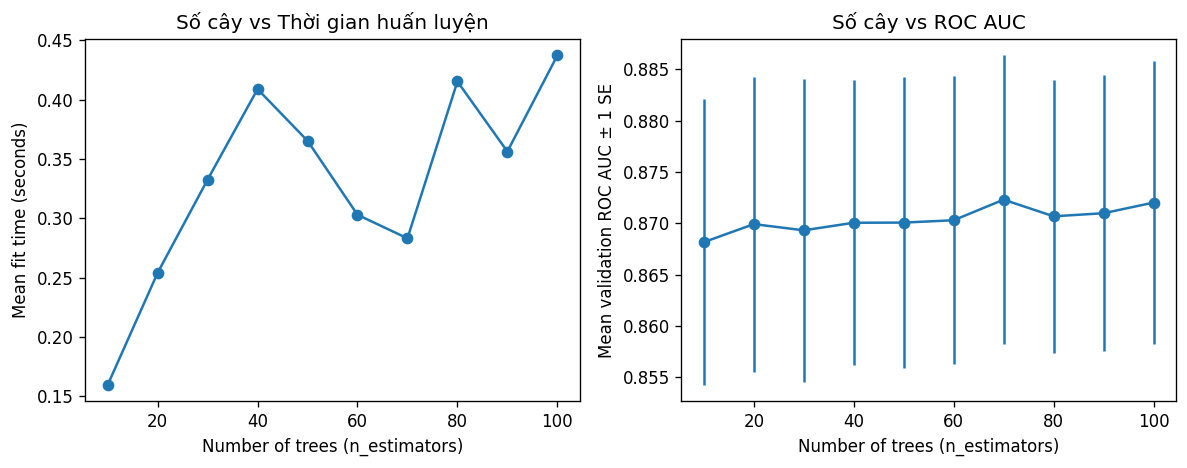

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Biểu đồ 1: số cây vs thời gian train trung bình
axs[0].plot(cv_rf_results_df['param_n_estimators'],
            cv_rf_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees (n_estimators)')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].set_title('Số cây vs Thời gian huấn luyện')

# Biểu đồ 2: số cây vs ROC AUC trên tập validation
axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score'] / np.sqrt(4),
                fmt='-o')
axs[1].set_xlabel('Number of trees (n_estimators)')
axs[1].set_ylabel('Mean validation ROC AUC ± 1 SE')
axs[1].set_title('Số cây vs ROC AUC')

plt.tight_layout()
plt.show()

RANDOM FOREST TỐI ƯU VÀ FEATURE IMPORTANCE

In [ ]:
print("Best params (Random Forest):", cv_rf.best_params_)

best_rf = cv_rf.best_estimator_

y_valid_pred_best_rf = best_rf.predict(X_valid)
y_valid_proba_best_rf = best_rf.predict_proba(X_valid)[:, 1]

print("=== Random Forest tốt nhất ===")
print("Accuracy:", accuracy_score(y_valid, y_valid_pred_best_rf))
print("ROC AUC :", roc_auc_score(y_valid, y_valid_proba_best_rf))
print("\nClassification report:\n", classification_report(y_valid, y_valid_pred_best_rf))

Best params (Random Forest): {'n_estimators': 70}
=== Random Forest tốt nhất ===
Accuracy: 0.8100558659217877
ROC AUC : 0.8411725955204216

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.84      0.62      0.72        69

    accuracy                           0.81       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.81      0.80       179



Random Forest với n_estimators=70 là mô hình tốt nhất, đạt AUC ≈ 0.84 và accuracy ≈ 0.81. Mô hình hoạt động ổn định, tổng quát tốt, vượt trội hơn Decision Tree, và phù hợp để lựa chọn làm mô hình cuối cùng cho bài toán dự đoán sống sót trên Titanic.

<Figure size 720x720 with 0 Axes>

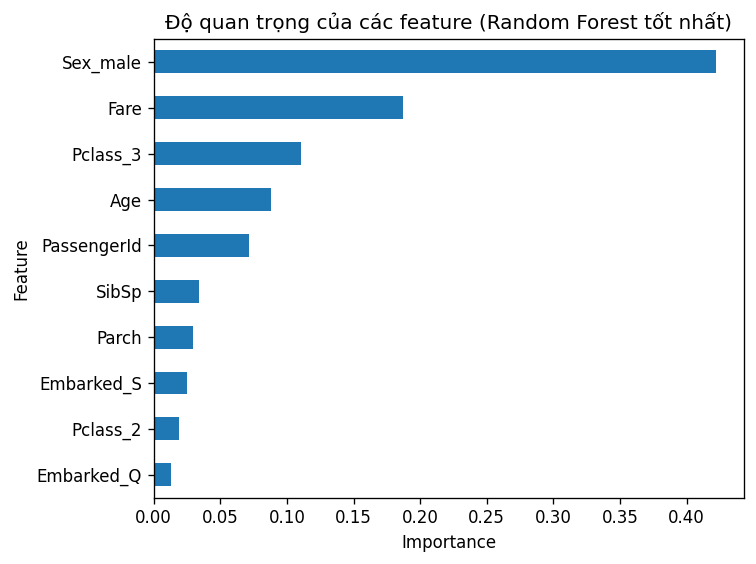

In [ ]:
feat_imp_df = pd.DataFrame({
    'Feature': full_encoded.columns,
    'Importance': best_rf.feature_importances_
})

# Sắp xếp tăng dần để vẽ bar chart ngang
feat_imp_df.sort_values('Importance', ascending=True, inplace=True)
feat_imp_df.set_index('Feature', inplace=True)

plt.figure(figsize=(6, 6))
feat_imp_df.plot.barh(legend=False)
plt.xlabel('Importance')
plt.title('Độ quan trọng của các feature (Random Forest tốt nhất)')
plt.tight_layout()
plt.show()

Random Forest xác định giới tính (Sex_male) là yếu tố mạnh nhất quyết định sống sót, tiếp theo là giá vé (Fare) và hạng vé (Pclass_3). Các đặc trưng còn lại chỉ đóng vai trò bổ trợ. Điều này hoàn toàn phù hợp với bối cảnh thực tế của thảm họa Titanic: phụ nữ, trẻ em và hành khách hạng cao có cơ hội sống sót cao hơn.